In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

import stemgraphic

import warnings
warnings.filterwarnings("ignore")

# Dataset Pressão Arterial

Dataframe pressão contém 500 pacientes (linhas) e 501 variáveis ou atributos (colunas).
Dos 500 pacientes, metade tinha pressão arterial baixa e metade, elevada (hipertensão).

As 501 variáveis (ou colunas) consistem de:
* pressão sistólica,
* 17 variáveis clínicas potencialmente preditoras de hipertensão,
* 483 marcadores genéticos (que foram eliminados na seleção das colunas)

Dados obtidos em: http://www.math.yorku.ca/Who/Faculty/Ng/ssc2003/BPMain.htm. Pesquisa conduzida pela empresa farmacêutica GlaxoSmithKline em Toronto, Canadá.

## Variáveis 
**sbp** $\Rightarrow$ Pressão arterial sistólica , variável contínua <br>
**gender** $\Rightarrow$  Variável Nominal Binária: M = Masculino, F = Feminino<br>
**married** $\Rightarrow$ Binário Nominal Variável: Y = Casado, N = Não Casado<br>
**smoke** $\Rightarrow$ Tabagismo, variável binária: Y = Fumante, N = Não fumante<br>
**exercise** $\Rightarrow$  Nível de exercício, variável categórica: 1 = Baixo, 2 = Médio, 3 = Alto<br>
**age** $\Rightarrow$ Variável contínua de idade (anos)<br>
**weight** $\Rightarrow$ Peso, variável contínua (lbs)<br>
**height** $\Rightarrow$ Altura, variável contínua (polegadas)<br>
**overwt** $\Rightarrow$ variável categórica: 1 = Normal, 2 = Sobrepeso, 3 = Obeso.<br>
**race** $\Rightarrow$ Raça, variável categórica tomando os valores 1, 2, 3 ou 4<br>
**alcohol** $\Rightarrow$ Uso de álcool, variável categórica: 1 = Baixo, 2 = Médio, 3 = Alto<br>
**trt** $\Rightarrow$ Tratamento trt para hipertensão, variável binária: Y = tratado, N = não tratado<br>
**bmi** $\Rightarrow$ Índice de massa corporal (IMC), variável contínua: peso / altura 2 * 703<br>
**stress** $\Rightarrow$ Nível de estresse de estresse: 1 = Baixo, 2 = Médio, 3 = Alto<br>
**salt** $\Rightarrow$ Nível de ingestão de sal de sal (NaCl): 1 = Baixo, 2 = Médio, 3 = Alto<br>
**chldbear** $\Rightarrow$ Potencial de procriação de um urso-filho: 1 = Homem, 2 = Mulher capaz, 3 = Mulher incapaz<br>
**income** $\Rightarrow$ Nível de renda, variável categórica: 1 = baixa, 2 = média, 3 = alta<br>
**educatn** $\Rightarrow$ Nível de educação educacional, variável categórica: 1 = baixo, 2 = médio, 3 = alto<br>

In [20]:
blood_df = pd.read_csv("data/BloodPressure.csv")
blood_df.head()

,sbp,gender,married,smoke,exercise,age,weight,height,overwt,race,alcohol,trt,bmi,stress,salt,chldbear,income,educatn
0,133,F,N,N,3,60,159,56,3,1,2,0,35,2,2,2,2,2
1,115,M,N,Y,1,55,107,65,1,1,2,0,17,2,2,1,3,2
2,140,M,N,Y,1,18,130,59,2,1,1,0,26,3,2,1,1,3
3,132,M,Y,N,2,19,230,57,3,2,3,1,49,3,3,1,1,2
4,133,M,N,N,2,58,201,74,2,1,3,0,25,2,2,1,2,3


## Histograma da pressão sistólica
Apresenta a distribuição dos indivíduos ao longo da faixa de valores de pressão sistólica.
É possível verificar que existe uma maior concentração de pacientes com pressão entre 120 e 145.

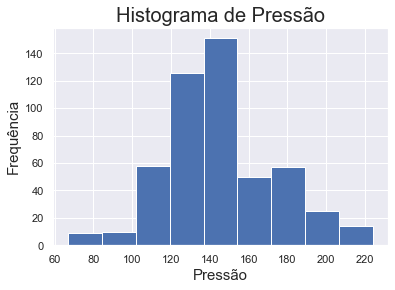

In [21]:
blood_df["sbp"].hist(bins=9)
plt.title("Histograma de Pressão",size=20)
plt.xlabel("Pressão",size=15)
plt.ylabel("Frequência",size=15)
plt.show()

## Histograma e densidade de probabilidade da pressão sistólica

As visualizações abaixo apresentam:
* Histograma
* Histograma + Gráfico de densidade 
* Histograma + Gráfico de densidade + Rug Plot(Um traço para cada valor exato)

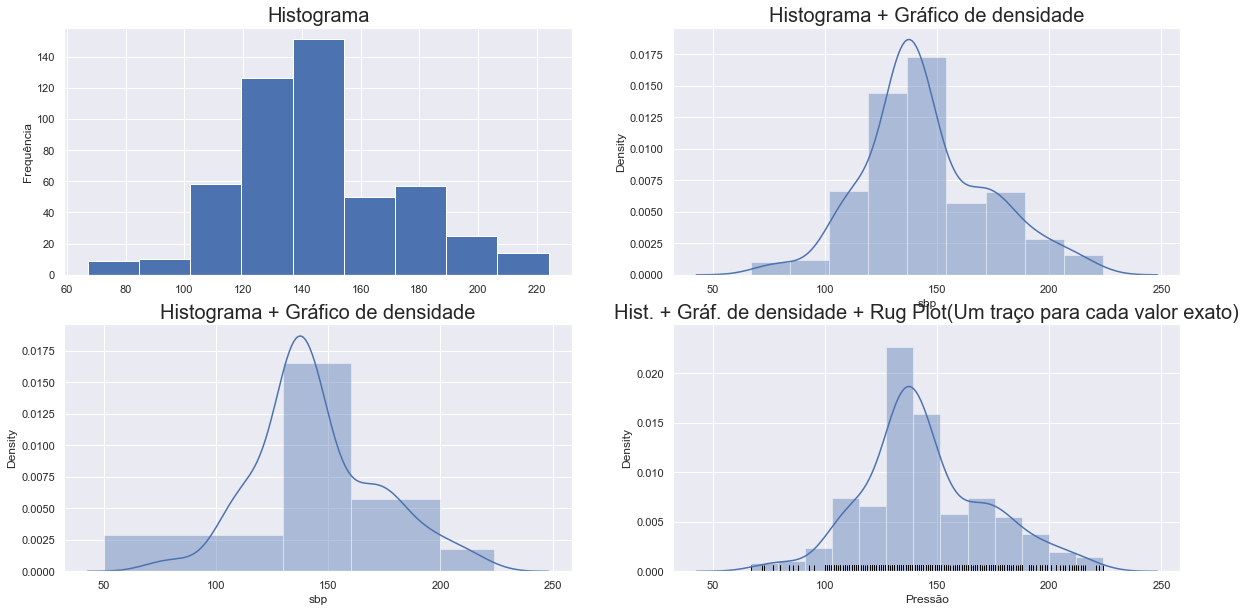

In [22]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title("Histograma", size=20)
blood_df["sbp"].hist(bins=9)
plt.ylabel("Frequência")

plt.subplot(2,2,2)
plt.title("Histograma + Gráfico de densidade", size=20)
sns.distplot(blood_df["sbp"],bins=9)

plt.subplot(2,2,3)
plt.title("Histograma + Gráfico de densidade", size=20)
sns.distplot(blood_df["sbp"], bins=[50, 130, 160, 200, max(blood_df["sbp"])])

plt.subplot(2,2,4)
plt.title("Hist. + Gráf. de densidade + Rug Plot(Um traço para cada valor exato)", size=20)
sns.distplot(blood_df["sbp"], bins=13, rug = True, rug_kws={'color': 'black'})
plt.xlabel("Pressão")
plt.show()

# BoxPlot  para pressão arterial

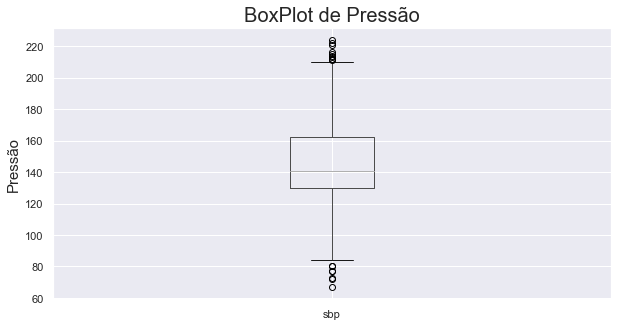

In [23]:
blood_df.boxplot(column='sbp',figsize=(10,5))
plt.title("BoxPlot de Pressão", size=20)
plt.ylabel("Pressão",size=15)
plt.show()

## BoxPlot  para pressão arterial segmentada por sobrepeso

Nesta visualização é possível comparar a distribuição da pressão arterial para diferentes valores de faixas de sobrepeso.

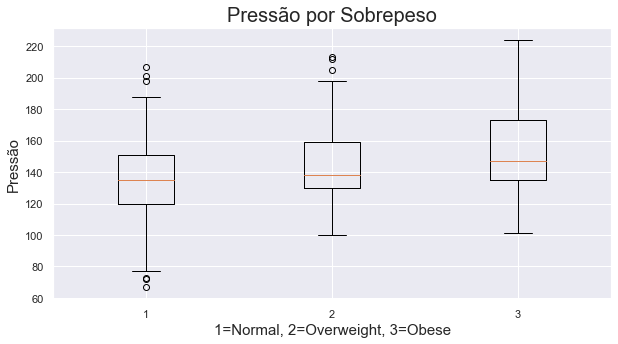

In [24]:
mask_normal = blood_df["overwt"] == 1
mask_overw = blood_df["overwt"] == 2
mask_obese = blood_df["overwt"] == 3

dist = [blood_df[mask_normal]["sbp"],blood_df[mask_overw]["sbp"],blood_df[mask_obese]["sbp"]]

plt.figure(figsize=(10,5))
plt.boxplot(dist)
plt.title("Pressão por Sobrepeso", size=20)
plt.xlabel("1=Normal, 2=Overweight, 3=Obese", size=15)
plt.ylabel("Pressão", size=15)
plt.show()

## BoxPlot  para pressão arterial segmentada por renda

Nesta visualização é possível comparar a distribuição da pressão arterial para diferentes valores de faixas de renda.

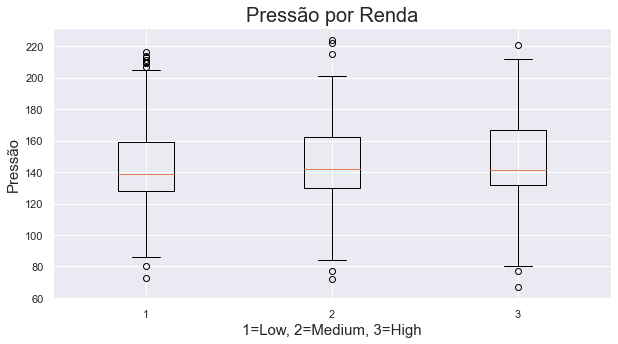

In [25]:
#Fazer filtros de sbp por overwt
mask_low = blood_df["income"] == 1
mask_medium = blood_df["income"] == 2
mask_high = blood_df["income"] == 3

dist = [blood_df[mask_low]["sbp"],blood_df[mask_medium]["sbp"],blood_df[mask_high]["sbp"]]

plt.figure(figsize=(10,5))
plt.boxplot(dist)
plt.title("Pressão por Renda", size=20)
plt.xlabel("1=Low, 2=Medium, 3=High", size=15)
plt.ylabel("Pressão", size=15)
plt.show()

## BoxPlot  para pressão arterial segmentada por sobrepeso e idade

Nesta visualização é possível comparar a distribuição da pressão arterial para diferentes valores de faixas de sobrepeso e idade.

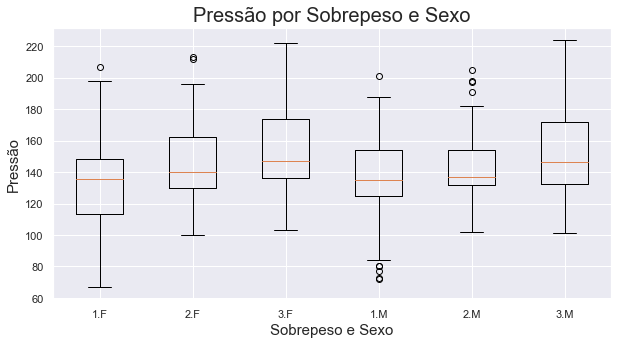

In [26]:
mask_normal = blood_df["overwt"] == 1
mask_overw = blood_df["overwt"] == 2
mask_obese = blood_df["overwt"] == 3

mask_f = blood_df["gender"] == 'F'
mask_m = blood_df["gender"] == 'M'

mask_normal_f = np.logical_and(mask_normal, mask_f)
mask_overw_f  = np.logical_and(mask_overw, mask_f)
mask_obese_f  = np.logical_and(mask_obese, mask_f)

mask_normal_m = np.logical_and(mask_normal, mask_m)
mask_overw_m  = np.logical_and(mask_overw, mask_m)
mask_obese_m  = np.logical_and(mask_obese, mask_m)

dist = [blood_df[mask_normal_f]["sbp"],blood_df[mask_overw_f]["sbp"],blood_df[mask_obese_f]["sbp"],
        blood_df[mask_normal_m]["sbp"],blood_df[mask_overw_m]["sbp"],blood_df[mask_obese_m]["sbp"]]


x_names = ['1.F','2.F','3.F','1.M','2.M','3.M']

plt.figure(figsize=(10,5))
plt.boxplot(dist)
plt.title("Pressão por Sobrepeso e Sexo", size=20)
plt.xlabel("Sobrepeso e Sexo", size=15)
plt.ylabel("Pressão", size=15)
plt.xticks([1,2,3,4,5,6],x_names)
plt.show()

## População brasileira 2006

## Variáveis

**Estado**<br> 
**Município**<br>
**População do município**

In [27]:
municipio_df = pd.read_csv("data/POP2006.csv", encoding='latin-1')
municipio_df.head()

,ESTADO,MUNICIPIO,POP2006
0,RO,Alta Floresta D'Oeste,29005
1,RO,Alto Alegre dos Parecis,15454
2,RO,Alto Paraíso,16510
3,RO,Alvorada D'Oeste,19542
4,RO,Ariquemes,86924


In [28]:
municipio_df.describe().T

,count,mean,std,min,25%,50%,75%,max
POP2006,5564.0,33567.678289,199100.73289,828.0,5087.0,10687.5,22814.25,11016703.0


In [29]:
mak_pop = municipio_df['POP2006']==11016703
municipio_df[mak_pop]

,ESTADO,MUNICIPIO,POP2006
3829,SP,São Paulo,11016703


## Histogramas 
As visualizações abaixo apresentam alguns histogramas que mostram as distribuições da população em determinadas faixas de quantidade de habitantes.

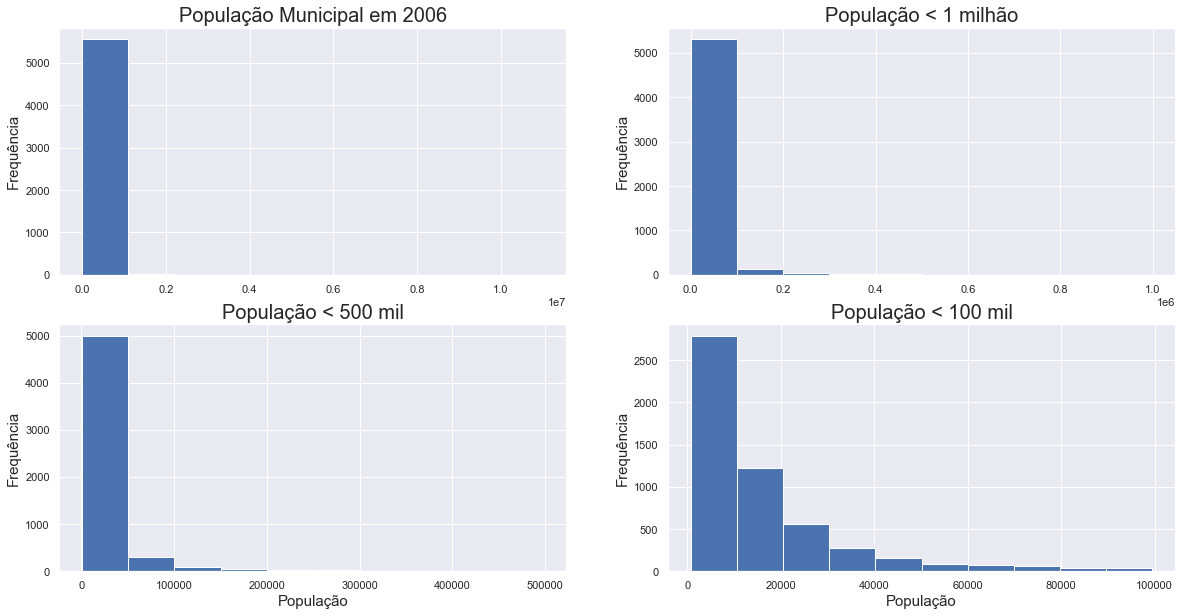

In [30]:
mask1 = municipio_df["POP2006"] < 1e6
mask2 = municipio_df["POP2006"] < 5e5
mask3 = municipio_df["POP2006"] < 1e5

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("População Municipal em 2006", size=20)
plt.ylabel("Frequência", size=15)
municipio_df["POP2006"].hist()

plt.subplot(2,2,2)
plt.title("População < 1 milhão", size=20)
plt.ylabel("Frequência", size=15)
municipio_df[mask1]["POP2006"].hist()

plt.subplot(2,2,3)
plt.title("População < 500 mil", size=20)
plt.xlabel("População", size=15)
plt.ylabel("Frequência", size=15)
municipio_df[mask2]["POP2006"].hist()

plt.subplot(2,2,4)
plt.title("População < 100 mil", size=20)
plt.xlabel("População", size=15)
plt.ylabel("Frequência", size=15)
municipio_df[mask3]["POP2006"].hist()

plt.show()

## Histograma Utilizando Escala Logarítmica na base 10

A mudança de escala foi empregada a fim de facilitar a visualização, isso por que a maior parte dos municípios tem uma população pequena o que dificulta colocar em um mesmo gráfico esses municípios e os municípios com população maior.

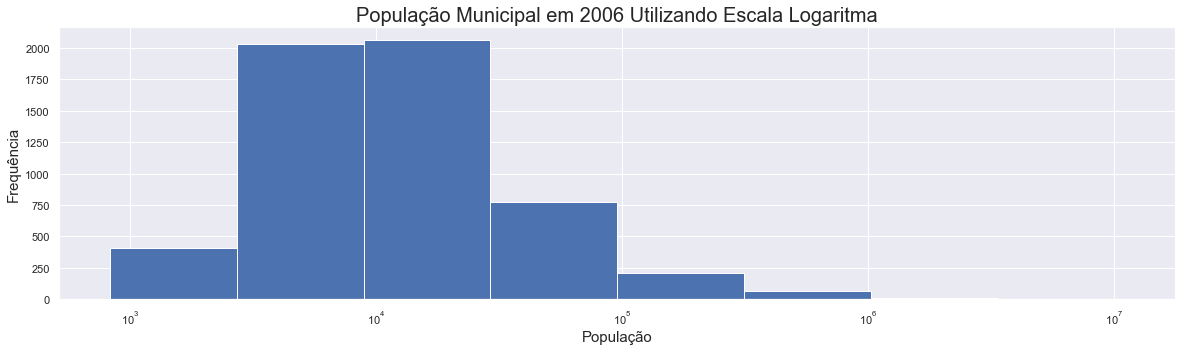

In [31]:
x = municipio_df["POP2006"]

plt.figure(figsize=(20,5))

bins = np.linspace(min(x),max(x),9)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))


plt.title("População Municipal em 2006 Utilizando Escala Logaritma", size=20)
plt.xlabel("População", size=15)
plt.ylabel("Frequência", size=15)
plt.hist(x, bins=logbins)
plt.xscale('log')

plt.show()

## Dataset Campeonato Brasileiro 2014

In [32]:
futebol_df = pd.read_csv("data/CampeonatoBrasileiro2014.csv")
futebol_df.head()

,Time,Pts,Jogos,Vit,Emp,Der,Gols,GolsSofr,SaldoGols,Aprov
0,Cruzeiro,80,38,24,8,6,67,38,29,70
1,Sao Paulo,70,38,20,10,8,59,40,19,61
2,Internacional,69,38,21,6,11,53,41,12,60
3,Corinthians,69,38,19,12,7,49,31,18,60
4,Atletico Mineiro,62,38,17,11,10,51,38,13,54


In [33]:
futebol_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pts,20.0,52.40,13.366888,32.0,42.25,52.0,61.25,80.0
Jogos,20.0,38.00,0.000000,38.0,38.00,38.0,38.00,38.0
Vit,20.0,14.40,4.441432,7.0,11.00,14.0,17.00,24.0
Emp,20.0,9.20,1.609184,6.0,8.00,10.0,10.00,12.0
Der,20.0,14.40,4.672428,6.0,11.00,14.5,17.50,22.0
Gols,20.0,43.00,10.691856,28.0,36.00,40.5,49.50,67.0
GolsSofr,20.0,43.00,8.143451,24.0,39.50,42.5,47.00,59.0
SaldoGols,20.0,0.00,15.834672,-28.0,-10.50,-1.5,12.25,29.0
Aprov,20.0,45.65,11.608867,28.0,37.25,45.0,53.25,70.0


## Diagrama de ramo e folhas
O diagrama de ramo e folhas é semelhante ao histograma, porém tem maior precisão, e ajuda a visualizar a forma de uma distribuição, o que auxilia na análise exploratória de dados.
Basicamente, é um histograma com os números, nos exemplos apresentados abaixo a dezena foi fixada e a unidade variou.

A partir das visualizações abaixo é possível verificar que existe uma concentração maior entre 30 e 40 na distribuição de gols feitos e 10 na distribuição do saldo de gols.

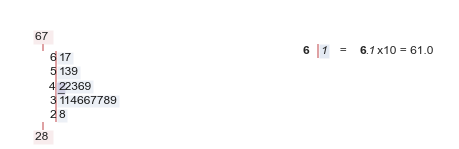

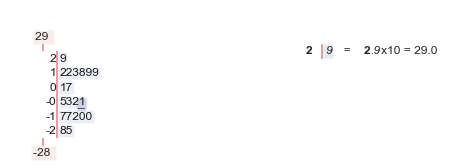

In [34]:
stemgraphic.stem_graphic(futebol_df["Gols"], scale = 10, aggregation=False)
stemgraphic.stem_graphic(futebol_df["SaldoGols"], scale = 10, aggregation=False)
plt.show()

## Dataset Carros

## Variáveis 

**mpg** - Milhas / galão (EUA)<br>
**cyl** - Número de cilindros<br>
**disp** - Displacement (cu.in.)<br>
**hp** - Potência bruta<br>
**drat** -Relação do eixo traseiro<br>
**wt** -Peso em peso (1000 libras)<br>
**qsec** - Tempo de 1/4 de milha<br>
**vs** - Motor (0 = em forma de V, 1 = reto)<br>
**am** - Transmissão (0 = automática, 1 = manual)<br>
**gear** - Engrenagem Número de marchas para frente <br>
**carb** - Número de carburadores

In [35]:
carros_df = pd.read_csv("data/mtcars.csv")
carros_df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Matriz de Gráficos de Dispersão

A visualização abaixo apresenta uma matriz com a forma da correlação entre pares de variáveis e na diagonal os histogramas das distribuições de cada variável.

## Variáveis utilizadas
**mpg** - Milhas / galão (EUA)<br>
**disp** - Displacement (cu.in.)<br>
**drat** -Relação do eixo traseiro<br>
**wt** -Peso em peso (1000 libras)<br>

<Figure size 720x720 with 0 Axes>

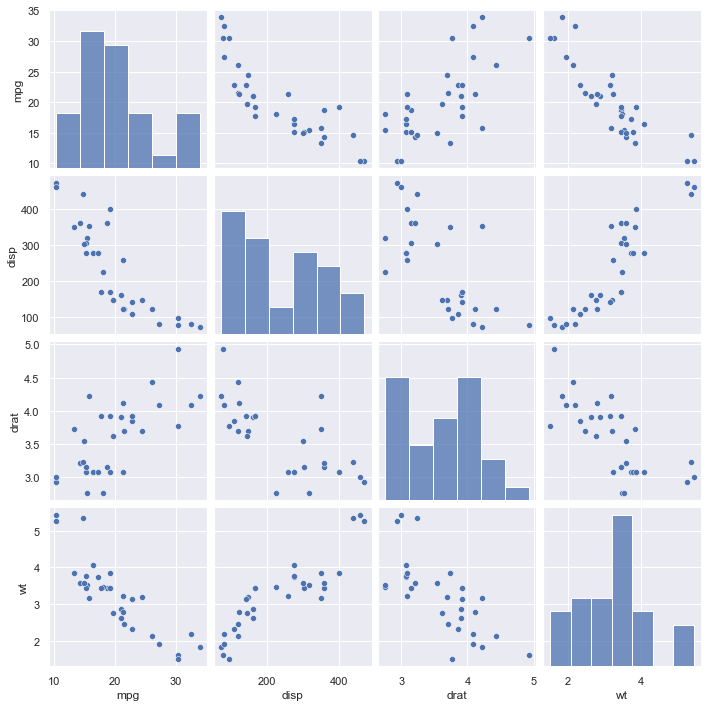

In [36]:
plt.figure(figsize=(10,10))
sns.pairplot(carros_df[["mpg","disp","drat","wt"]])
plt.show()